In [40]:
import pandas as pd
import matplotlib.pyplot as plt 
import json


In [24]:
df_pop = pd.read_csv('wohnbevolkerung-nach-monat-altersklasse-geschlecht-staatsangehorigkeit-und-quart.csv', sep=';')

In [37]:
for column in df_pop.columns:
    if column == "monat_jahr":
        continue
    print(column,"#",df_pop[column].nunique(),df_pop[column].unique())

Column: jahr # 16 Values [2023 2020 2022 2019 2021 2018 2012 2011 2010 2009 2017 2016 2015 2014
 2013 2008]
Column: monat # 12 Values [ 1  2  3  4  5  6  7  8  9 10 11 12]
Column: altersklasse # 5 Values ['0-17' '18-39' '40-59' '60-79' '80+']
Column: geschlecht # 2 Values ['M' 'W']
Column: staat_d # 2 Values ['Ausland' 'Schweiz']
Column: kreis # 4 Values ['Kreis Ost' 'Kreis West' 'Kreis Centrum' 'Nicht zuteilbar']
Column: quartiergruppe # 15 Values ['Rotmonten' 'Lachen' 'Linsebühl-Dreilinden' 'Notkersegg' 'Bruggen'
 'Winkeln' 'Rosenberg' 'nicht zuteilbar' 'St.Fiden' 'Riethüsli' 'St.Jakob'
 'Innenstadt' 'Langgass-Heiligkreuz' 'Neudorf' 'St.Georgen']
Column: anzahl # 1343 Values [  57  251  182 ... 1279 1192 1257]


In [36]:

df_pop['quartiergruppe'].nunique()

15

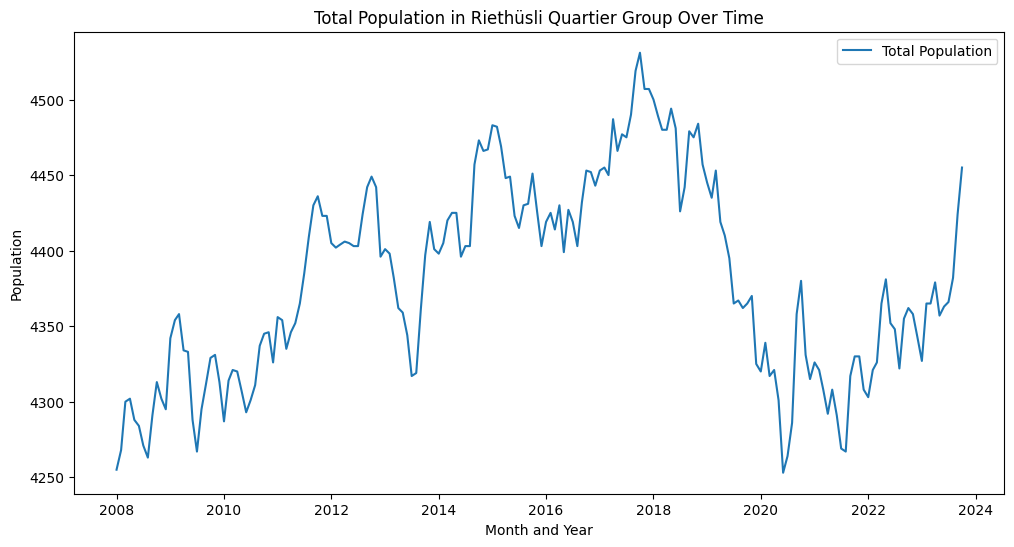

In [28]:

# Filter data for the Riethüsli quartier group
df_riethusli = df_pop[df_pop['quartiergruppe'] == 'Riethüsli']

# Group data by month and year, summing up the population across all age groups
df_riethusli_grouped = df_riethusli.groupby('monat_jahr')['anzahl'].sum().reset_index()

# Convert 'monat_jahr' to datetime for proper plotting
df_riethusli_grouped['monat_jahr'] = pd.to_datetime(df_riethusli_grouped['monat_jahr'])

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_riethusli_grouped['monat_jahr'], df_riethusli_grouped['anzahl'], label='Total Population')
plt.xlabel('Month and Year')
plt.ylabel('Population')
plt.title('Total Population in Riethüsli Quartier Group Over Time')
plt.legend()
plt.show()


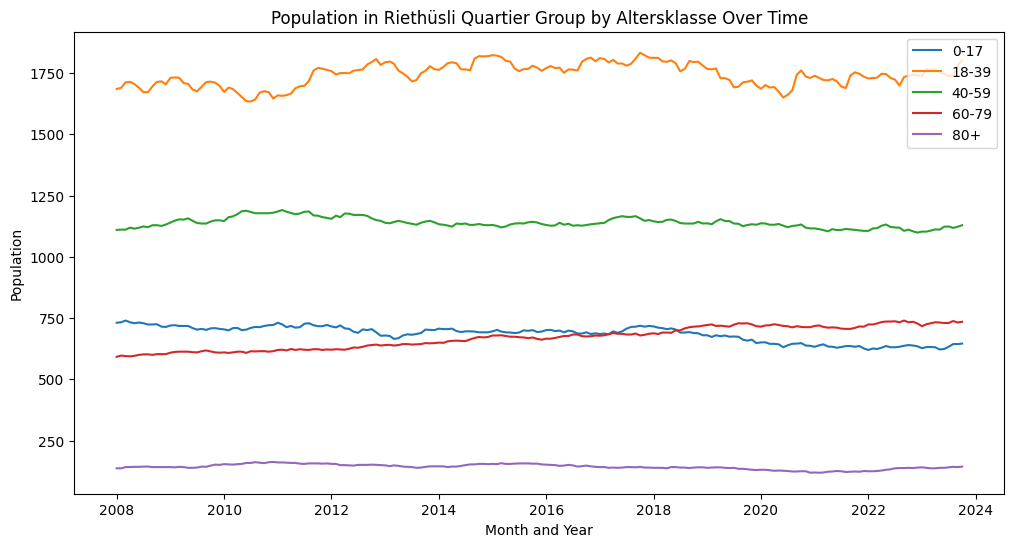

In [30]:
# Define the altersklassen
altersklassen = ['0-17', '18-39', '40-59', '60-79', '80+']

# Plotting the data
plt.figure(figsize=(12, 6))
for altersklasse in altersklassen:
    # Filter data for each altersklasse
    df_temp = df_riethusli[df_riethusli['altersklasse'] == altersklasse]
    # Group by month and year, summing the population
    df_temp_grouped = df_temp.groupby('monat_jahr')['anzahl'].sum().reset_index()
    # Convert 'monat_jahr' to datetime
    df_temp_grouped['monat_jahr'] = pd.to_datetime(df_temp_grouped['monat_jahr'])
    # Plot
    plt.plot(df_temp_grouped['monat_jahr'], df_temp_grouped['anzahl'], label=altersklasse)

plt.xlabel('Month and Year')
plt.ylabel('Population')
plt.title('Population in Riethüsli Quartier Group by Altersklasse Over Time')
plt.legend()
plt.show()

# compare neighbourhoods in population data and geojson

In [56]:

# Load the GeoJSON file
file_path = 'wohnviertel_stadt-stgallen.geojson'  # Replace with your file path
with open(file_path, 'r') as file:
    geojson_data = json.load(file)

# Extract 'quartiergr' and 'statistisc' from each feature
quartiergr_list = []
statistisc_list = []
for feature in geojson_data['features']:
    properties = feature['properties']
    quartiergr_list.append(properties.get('quartiergr', None))
    statistisc_list.append(properties.get('statistisc', None))

# Convert to a DataFrame for easy counting
df = pd.DataFrame({
    'quartiergr': quartiergr_list,
    'statistisc': statistisc_list
})

# Count unique values
quartiergr_geojson = df['quartiergr'].unique()
statistisc = df['statistisc'].unique()

# Print the counts
print("Quartiergr:\n", quartiergr_geojson, "anzahl: ", len(quartiergr_geojson))
print("\nStatistisc:\n", statistisc)


Quartiergr:
 ['Riethüsli' 'Bruggen' 'St.Georgen' 'Linsenbühl-Dreilinden' 'Rosenberg'
 'Winkeln' 'Notkersegg' 'Neudorf' 'St.Fiden' 'St.Jakob' 'Innenstadt'
 'Lachen' 'Langgass-Heiligkreuz' 'Rotmonten'] anzahl:  14

Statistisc:
 ['Riethüsli' 'Haggen-Oberstrasse-Langweid' 'St.Georgen-Bach'
 'Bruggen-Zürcherstrasse' 'Linsenbühl-Dreilinden' 'Rosenberg-Kreubleiche'
 'Chräzeren' 'Kurzegg-Rank' 'Altenwegen' 'Stephanshorn-Zil-Kesselhalden'
 'St.Fiden-Krontal' 'St.Jakob' 'Gübsensee' 'St.Leonhard-Ost' 'Altstadt'
 'Winkeln Süd' 'Sittertobel' 'Achslen-Wilen' 'Vonwil-Lachen-Schoren'
 'Langgass-Heiligkreuz' 'Moos-Waldacker-Lerchenfeld'
 'Breitfeld-Gründenmoos' 'Winkeln Nord-Industrie' 'Boppartshof-Hinterberg'
 'Hub-Schaugentobel' 'Stuelegg-Rüti' 'Rotmonten' 'Hölzli-Joosrüti'
 'Notkersegg' 'St.Georgen-Bernegg' 'Hafnersberg']


In [57]:
quartier_pop = df_pop['quartiergruppe'].unique()
print(quartier_pop,"Anzahl: ",len(quartier_pop))    

['Rotmonten' 'Lachen' 'Linsebühl-Dreilinden' 'Notkersegg' 'Bruggen'
 'Winkeln' 'Rosenberg' 'nicht zuteilbar' 'St.Fiden' 'Riethüsli' 'St.Jakob'
 'Innenstadt' 'Langgass-Heiligkreuz' 'Neudorf' 'St.Georgen'] Anzahl:  15


In [54]:
for quartier in quartier_pop:
    if quartier not in quartiergr_geojson:
        print(quartier)

Linsebühl-Dreilinden
nicht zuteilbar


"nicht zuteilbar" can be ignored.
"Linsebühl" has a typo in the geojson file.

# Conclusion
All neighbourhoods have demographic data and corresponding geojson data.

For now <span style="color: red;">we will ignore population demographics</span> since the collection points are not corresponding to the neighbourhoods. Some collection points cluster in one neighbourhood, others are shared by multiple neighbourhoods.

We <span style="color: red;">focus on fillingrates</span> to categorize the collection points.
